# HW 1 - KNN Classification Using The USPS Dataset

## Load the USPS Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import h5py

In [2]:
path = "usps.h5"
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        x_train = train.get('data')[:]
        y_train = train.get('target')[:]
        test = hf.get('test')
        x_test = test.get('data')[:]
        y_test = test.get('target')[:]

In [3]:
print(f"x_train.shape=={x_train.shape}")
print(f"y_train.shape=={y_train.shape}")
print(f"x_test.shape=={x_test.shape}")
print(f"y_test.shape=={y_test.shape}")

x_train.shape==(7291, 256)
y_train.shape==(7291,)
x_test.shape==(2007, 256)
y_test.shape==(2007,)


## We see an example image/label from the x_train subset:

In [4]:
some_image = x_train[1]
some_digit_image = some_image.reshape(16, 16)

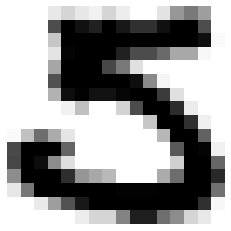

In [5]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [6]:
y_train[1]

5

Below, we make sure that the datatype for y_train is int.

In [7]:
y_train.dtype

dtype('int32')

# Using KNN For Classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
knn = KNeighborsClassifier(n_jobs=-1)

In [23]:
grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'leaf_size': (20,40,1),
    'p': (1,2),
    'metric': ('minkowski', 'chebyshev')
}

In [24]:
grid_search_clf = GridSearchCV(estimator=knn, param_grid=grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)

In [25]:
grid_search_clf.fit(X=x_train, y=y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': (1, 2), 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [26]:
grid_search_clf.best_score_

0.966397207249643

In [27]:
grid_search_clf.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

## Now lets create the the KNN model based on our GridSearch

In [28]:
final_knn = KNeighborsClassifier(n_neighbors=1, weights= 'uniform', n_jobs=-1, leaf_size=20, metric='minkowski', p=2)

In [29]:
final_knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=20, n_jobs=-1, n_neighbors=1)

In [30]:
final_knn.score(x_test, y_test)

0.9436970602889886

## We have acheived an accuracy of 94.37% using KNN.
The parameters are:

`{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}`